##Decision Tree Visualization with Graphviz

In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import operator
from sklearn.ensemble import RandomForestClassifier


In [229]:
instagram = pd.read_csv(os.path.join('train.csv'))
instagram.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [230]:
instagram=instagram.sample(frac=1).reset_index(drop=True)

In [231]:
y = instagram["fake"]
X = instagram.drop(["fake", "nums/length fullname", "name==username", "external URL"], axis=1)


In [232]:
import random

In [233]:
def fix(output):
    if output == 0:
        return 'Real'
    else:
        return 'Fake'

In [234]:
y = y.map(lambda x:fix(x))

In [236]:
clf = DecisionTreeClassifier(random_state=0)

# # Train model
model = clf.fit(X, y)

In [237]:
feature_names = list(X.columns.values)
#print(feature_names)
#feature_names.pop()
print(feature_names)

['profile pic', 'nums/length username', 'fullname words', 'description length', 'private', '#posts', '#followers', '#follows']


In [238]:
len(feature_names)

8

In [239]:
import numpy as np

In [240]:
y = y.to_numpy()
y = y.astype('<U10')

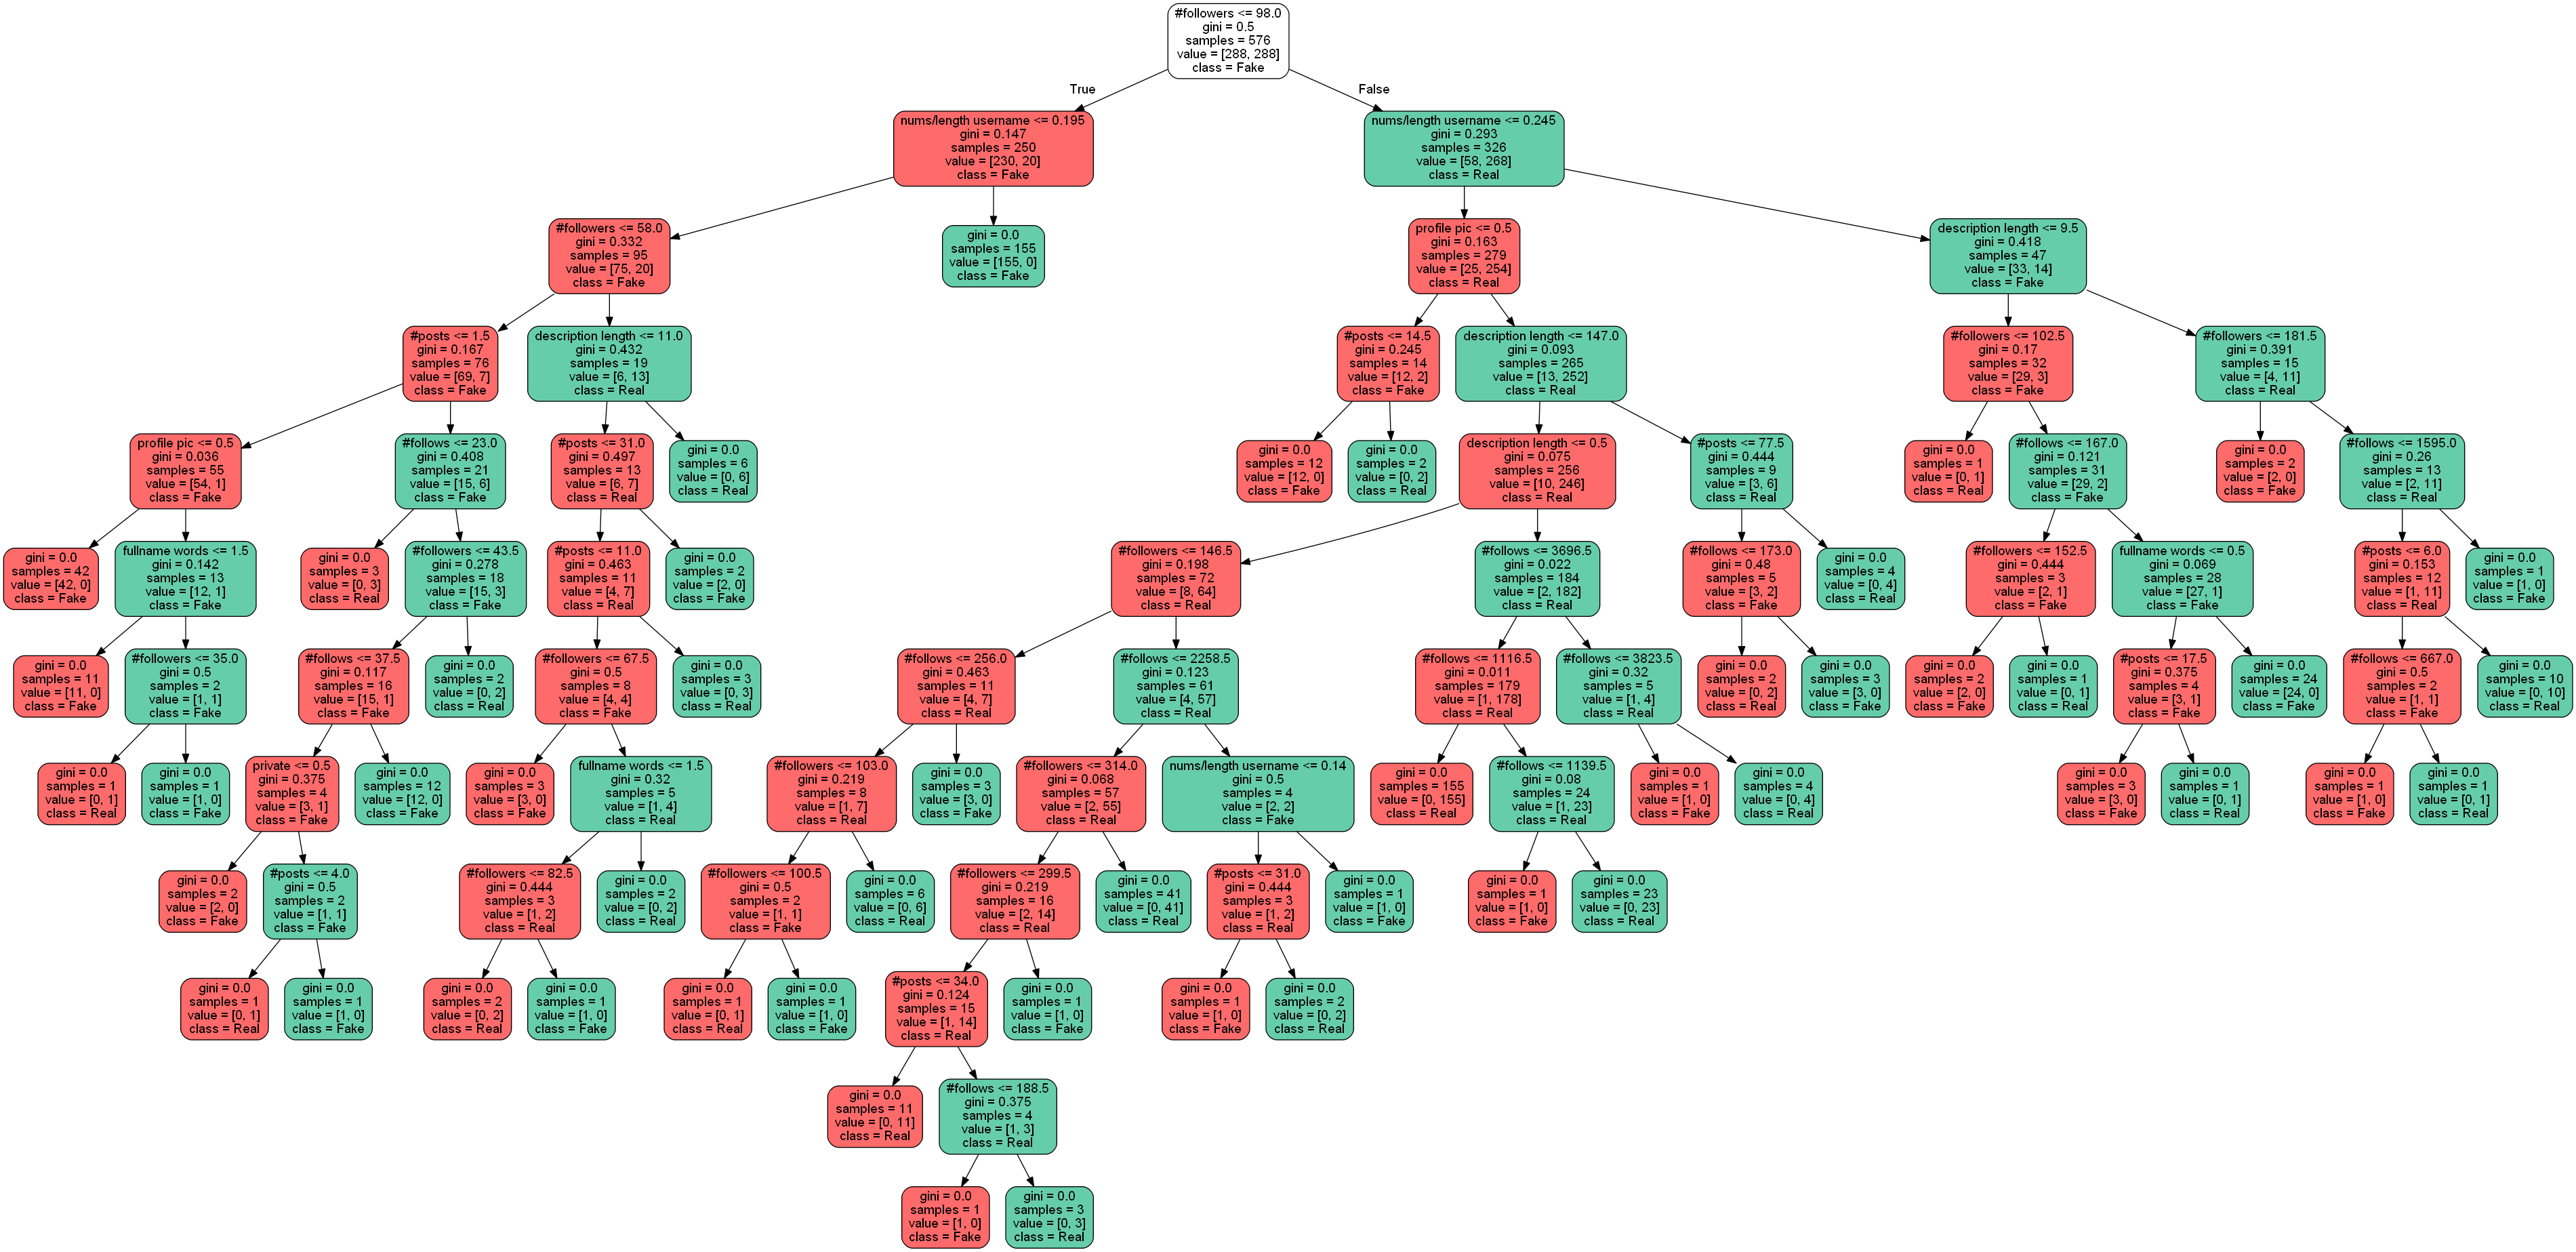

In [254]:
import collections
dot_data = tree.export_graphviz(clf, 
                                feature_names=feature_names,
                                class_names=y,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())



# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('indianred1', 'aquamarine3')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Show graph
Image(graph.create_png())

In [255]:
graph.write_png("decision_tree_colored_8_features.png")

True